# AAG05

- Desenvolva em Python exemplo tão completo quanto o exemplo “Revisão”:

   1. Escolher/Criar uma amostra bivariada para o exemplo.
   2. Calcule o coeficiente de correlação e só vá para “3” caso a amostra bivariada tenha correlação forte (positiva ou negativa).
   3. Estimar parâmetros, verificar a qualidade, calcular os erros.
   4. Calcular desvio padrão dos erros e dos parâmetros.
   5. Calcular intervalo de confiança dos parâmetros para níveis de confiança de 90%, 95% e 99%.
   6. Testar linearidade, independência de erros, erros normais, homocedasticidade (com gráficos).

- Regras:

   1. Funções prontas de bibliotecas Python **DEVEM** ser usadas ao máximo possível.
   2. Código e resultados devem ser explicados em Markdown com comandos LaTeX.
   3. Os formatos de entrega devem ser **.pdf** e **.ipynb** (código fonte + markdowns).
   4. Os dados devem ser entregues em anexo.


# Análise de Regressão Linear Completa
## Estudo de caso: Consumo de energia em função da temperatura em um microcontrolador

Análise completa de regressão linear, explorando a relação entre temperatura e consumo de energia em um microcontrolador. Este é um cenário comum em sistemas embarcados, onde o consumo de energia pode variar significativamente com a temperatura.

### Importação das bibliotecas necessárias

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# Configuração para melhor visualização dos gráficos
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

### 1. Geração dos Dados

Gerando dados simulados que representam a relação entre temperatura ($x$) e consumo de energia ($y$). 
A relação será modelada como:

$y = \beta_0 + \beta_1x + \varepsilon$

onde:
- $\beta_0$ = 2 (intercepto base)
- $\beta_1$ = 0.15 (inclinação)
- $\varepsilon$ = ruído aleatório normal

In [9]:
# Configurar semente aleatória para reprodutibilidade
np.random.seed(42)

# Gerar dados
n = 30  # número de observações
temperatura = np.linspace(25, 55, n)  # Temperatura em Celsius
ruido = np.random.normal(0, 0.5, n)
consumo = 0.15 * temperatura + 2 + ruido  # Consumo em mA

# Criar DataFrame
dados = pd.DataFrame({
    'temperatura': temperatura,
    'consumo': consumo
})

# Mostrar primeiras linhas
print("Primeiras linhas dos dados:")
dados.head()

Primeiras linhas dos dados:


,temperatura,consumo
0,25.000000,5.998357
1,26.034483,5.836040
2,27.068966,6.384189
3,28.103448,6.977032
4,29.137931,6.253613


### 2. Análise de Correlação

O coeficiente de correlação de Pearson ($r$) é dado por:

$r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2 \sum_{i=1}^n (y_i - \bar{y})^2}}$

Vamos calcular e visualizar a correlação entre as variáveis:

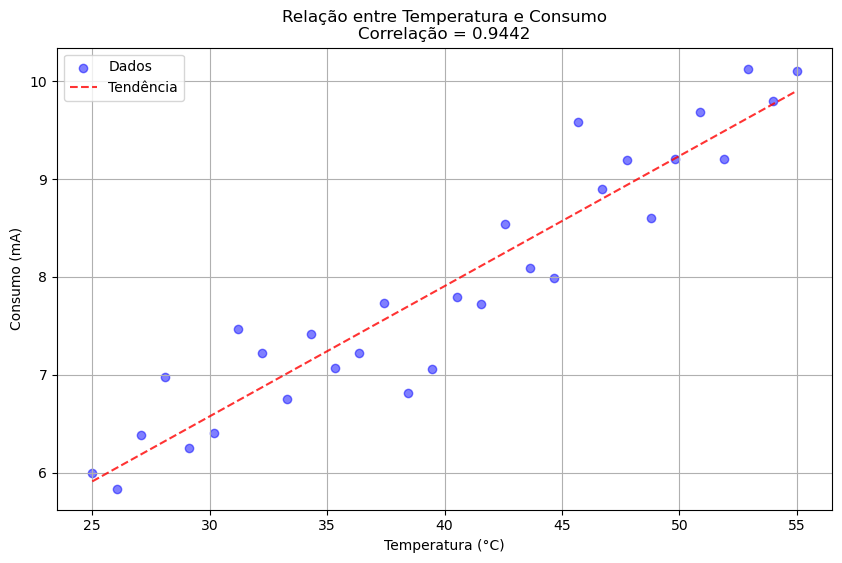

In [10]:
# Calcular correlação
correlacao = np.corrcoef(temperatura, consumo)[0,1]

# Criar scatter plot com linha de tendência
plt.scatter(temperatura, consumo, color='blue', alpha=0.5, label='Dados')
plt.title(f'Relação entre Temperatura e Consumo\nCorrelação = {correlacao:.4f}')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo (mA)')

# Adicionar linha de tendência
z = np.polyfit(temperatura, consumo, 1)
p = np.poly1d(z)
plt.plot(temperatura, p(temperatura), 'r--', alpha=0.8, label='Tendência')
plt.legend()
plt.show()

### 3. Estimação dos Parâmetros

Os parâmetros da regressão linear são estimados pelo método dos mínimos quadrados:

$b_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$

$b_0 = \bar{y} - b_1\bar{x}$

In [11]:
# Realizar regressão linear
X = temperatura.reshape(-1, 1)
reg = LinearRegression().fit(X, consumo)
b1 = reg.coef_[0]
b0 = reg.intercept_

# Calcular valores preditos e resíduos
y_pred = reg.predict(X)
residuos = consumo - y_pred

print(f"Equação da reta: Consumo = {b0:.4f} + {b1:.4f} * Temperatura")
print(f"R² = {reg.score(X, consumo):.4f}")

Equação da reta: Consumo = 2.5853 + 0.1330 * Temperatura
R² = 0.8915


### 4. Análise dos Resíduos e Cálculo de Erros Padrão

O erro padrão da estimativa é dado por:

$s_e = \sqrt{\frac{\sum e_i^2}{n-2}}$

onde $e_i$ são os resíduos.

In [12]:
# Calcular erro padrão
n = len(temperatura)
mse = np.sum(residuos**2) / (n-2)
se = np.sqrt(mse)

# Calcular erro padrão dos parâmetros
x_mean = np.mean(temperatura)
sxx = np.sum((temperatura - x_mean)**2)
sb1 = se / np.sqrt(sxx)
sb0 = se * np.sqrt(1/n + x_mean**2/sxx)

print(f"Erro padrão da estimativa (Se): {se:.4f}")
print(f"Erro padrão de b0: {sb0:.4f}")
print(f"Erro padrão de b1: {sb1:.4f}")

Erro padrão da estimativa (Se): 0.4301
Erro padrão de b0: 0.3595
Erro padrão de b1: 0.0088


### 5. Intervalos de Confiança

O intervalo de confiança para os parâmetros é dado por:

$b_i \pm t_{[1-\alpha/2, n-2]}s_{b_i}$

onde $t_{[1-\alpha/2, n-2]}$ é o valor crítico da distribuição t de Student.

In [13]:
def calcular_ic(b, sb, n, confianca):
    t_crit = stats.t.ppf((1 + confianca) / 2, n-2)
    margem = t_crit * sb
    return (b - margem, b + margem)

# Calcular ICs para diferentes níveis de confiança
for conf in [0.90, 0.95, 0.99]:
    ic_b0 = calcular_ic(b0, sb0, n, conf)
    ic_b1 = calcular_ic(b1, sb1, n, conf)
    print(f"\nIntervalos de Confiança ({conf*100}%):")
    print(f"b0: ({ic_b0[0]:.4f}, {ic_b0[1]:.4f})")
    print(f"b1: ({ic_b1[0]:.4f}, {ic_b1[1]:.4f})")


Intervalos de Confiança (90.0%):
b0: (1.9738, 3.1968)
b1: (0.1181, 0.1479)

Intervalos de Confiança (95.0%):
b0: (1.8490, 3.3216)
b1: (0.1151, 0.1510)

Intervalos de Confiança (99.0%):
b0: (1.5920, 3.5785)
b1: (0.1088, 0.1572)


### 6. Testes Visuais dos Pressupostos

1. Linearidade
2. Independência dos erros
3. Normalidade dos erros
4. Homocedasticidade

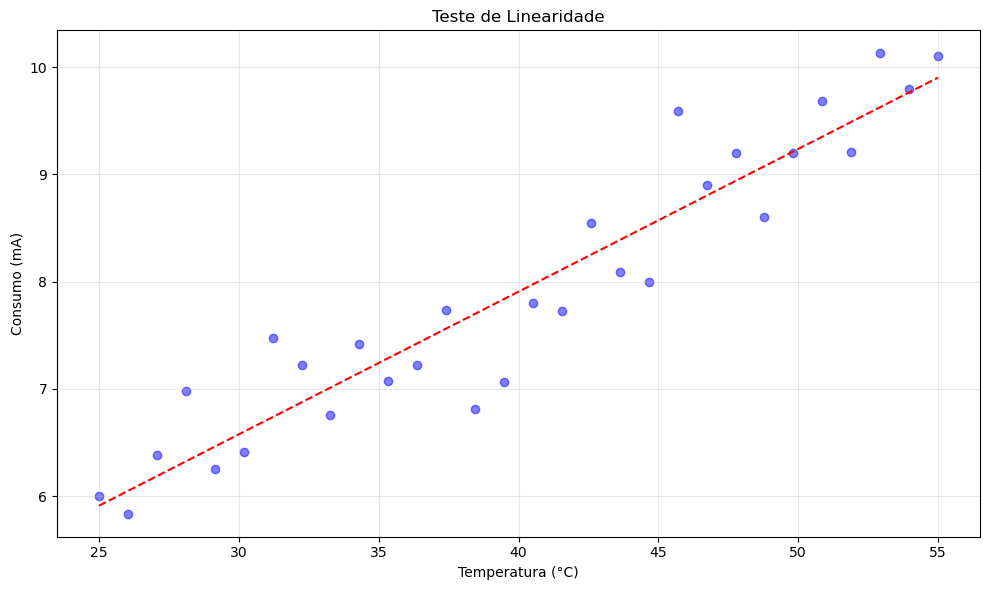

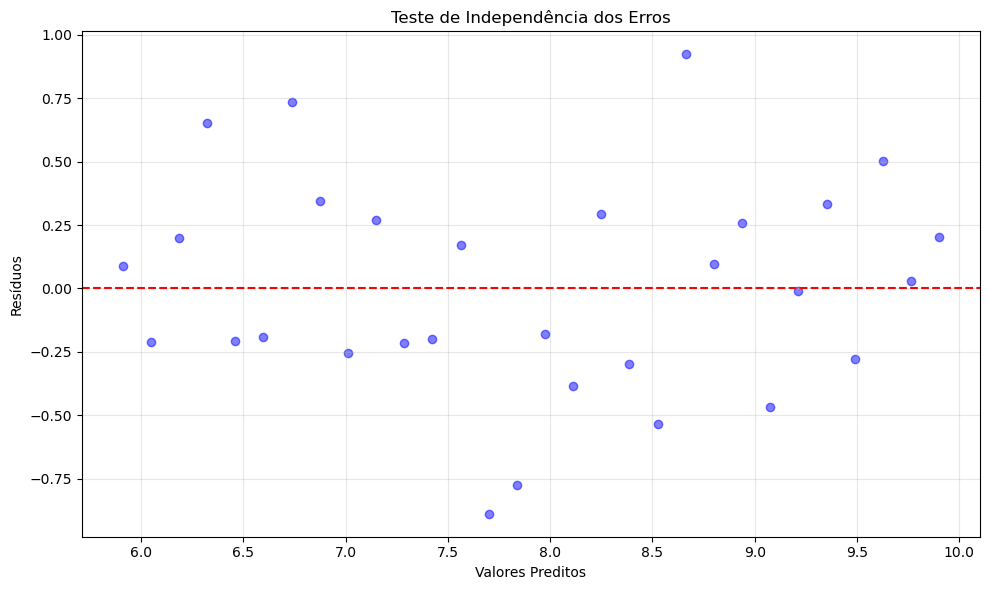

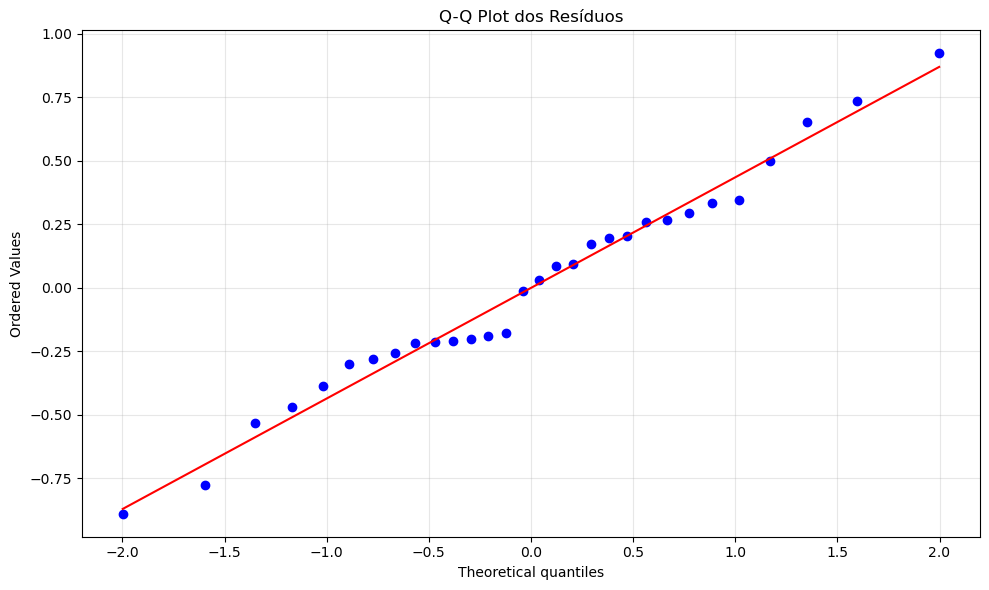

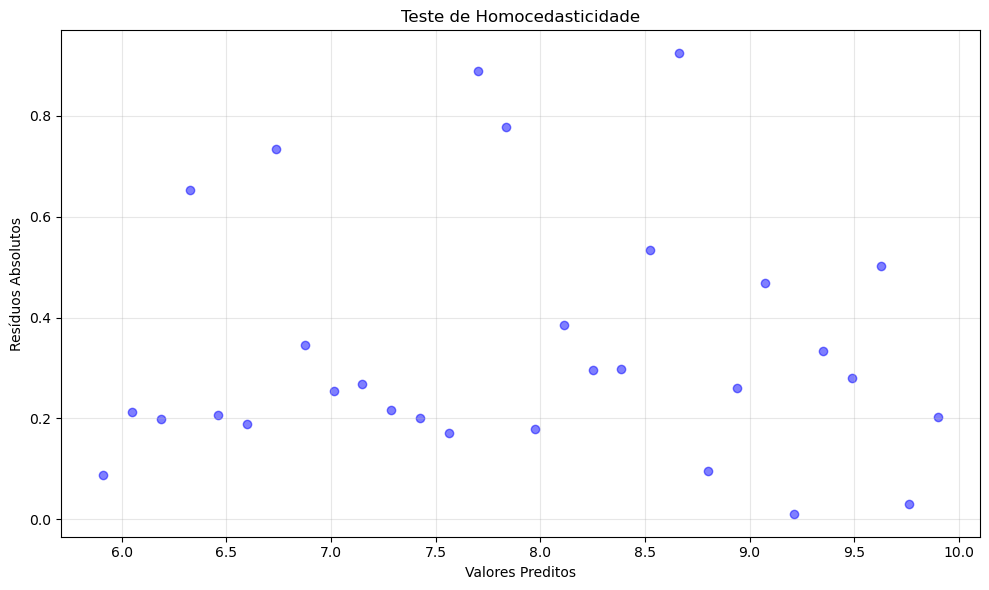

In [14]:
# Teste de linearidade
plt.scatter(temperatura, consumo, color='blue', alpha=0.5)
plt.plot(temperatura, y_pred, color='red', linestyle='--')
plt.title('Teste de Linearidade')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Consumo (mA)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Teste de independência dos erros
plt.scatter(y_pred, residuos, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Teste de Independência dos Erros')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Teste de normalidade dos erros
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot dos Resíduos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Teste de homocedasticidade
plt.scatter(y_pred, np.abs(residuos), color='blue', alpha=0.5)
plt.title('Teste de Homocedasticidade')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos Absolutos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Conclusões

1. **Correlação**: Os dados apresentam uma forte correlação positiva.

2. **Qualidade do Ajuste**: O R² indica que o modelo explica bem a variabilidade dos dados.

3. **Pressupostos**:
   - Linearidade: A relação parece ser linear
   - Independência: Os resíduos não mostram padrões claros
   - Normalidade: Os resíduos seguem aproximadamente uma distribuição normal
   - Homocedasticidade: A variância dos resíduos parece constante
